**PRIMEIRA ATIVIDADE DA DISCIPLINA SÉRIES TEMPORAIS**

**PROFESSOR: Pedro Henrique Magalhães Braga**

**DISCENTE:** **Valéria Cristina A. R. de Figueredo**

**OBJETIVO DO TRABALHO**

O presente trabalho realizará as seguintes atividades: definição de uma base de dados, análise dos dados, tratamento dos dados, escolha de dois modelos, avaliações via utilização de métricas e comparação de modelos.

# **1. Base de dados**

In [ ]:
# Instalar a ferramenta gdown
!pip install gdown

# Baixar o arquivo usando gdown
!gdown "https://drive.google.com/uc?id=1iq8oFIAC1HtG3aNMeTKi5NOtJPYv5dvK"

# Descompactar o arquivo
!unzip archive.zip -d data/

Downloading...
From: https://drive.google.com/uc?id=1iq8oFIAC1HtG3aNMeTKi5NOtJPYv5dvK
To: /content/archive.zip
100% 6.74k/6.74k [00:00<00:00, 14.6MB/s]
Archive:  archive.zip
  inflating: data/Europe_GDP.csv     


O presente dataset foi extraido do Kaggle. Esse conjunto de dados chamado "GDP Growth of European Countries" contém informações sobre o crescimento do GDP ("PIB") de mais de 15 países europeus, abrangendo o período de 1960 a 2023. O nome do indicador é PIB, moeda: US$ e o código correspondente do indicador é NY.GDP.MKTP.CD.".

O "GDP growth" (crescimento do PIB) refere-se à taxa de aumento ou diminuição da produção econômica de um país em um determinado período de tempo. O PIB é a soma de todos os bens e serviços produzidos em um país. O seu crescimento mede o quanto a economia de um país está crescendo ou encolhendo em relação ao período anterior.

Link [dataset gdp](https://www.kaggle.com/datasets/stealthtechnologies/gdp-growth-of-european-countries)


# **2.Bibliotecas**

In [ ]:
!pip install pmdarima
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster
from scipy.spatial.distance import squareform
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score, mean_absolute_error, mean_squared_error
import missingno as msno
from statsmodels.graphics.tsaplots import plot_acf,  plot_pacf
import warnings
warnings.filterwarnings('ignore')
from pmdarima.arima import KPSSTest, auto_arima
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


# **3. Tratamento e Análise de dados**

In [ ]:
df = pd.read_csv('data/Europe_GDP.csv')
df.head(63)


,Year,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Italy,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
0,1960,6.650134e+09,1.181062e+10,6.361166e+09,5.279011e+09,6.222548e+10,8.431095e+10,4.335192e+09,2.521697e+08,1.998550e+09,4.191581e+10,7.099419e+08,1.326346e+10,5.197399e+09,3.339150e+09,1.243339e+10,1.595320e+10,1.041223e+10,7.323397e+10
1,1961,7.375455e+09,1.256170e+10,7.058361e+09,5.983900e+09,6.746164e+10,9.620573e+10,4.961399e+09,2.577032e+08,2.151773e+09,4.654222e+10,7.101637e+08,1.457838e+10,5.669689e+09,3.573719e+09,1.424830e+10,1.735478e+10,1.171335e+10,7.774197e+10
2,1962,7.823687e+09,1.343683e+10,7.953274e+09,6.407225e+09,7.560753e+10,1.055090e+11,5.213043e+09,2.892007e+08,2.329373e+09,5.229335e+10,7.478469e+08,1.582429e+10,6.107077e+09,3.835884e+09,1.662150e+10,1.882135e+10,1.298965e+10,8.124756e+10
3,1963,8.447137e+09,1.444581e+10,8.466045e+09,6.958296e+09,8.475920e+10,1.118230e+11,5.895281e+09,3.451750e+08,2.505073e+09,5.989787e+10,7.979022e+08,1.716848e+10,6.553270e+09,4.084252e+09,1.964575e+10,2.037167e+10,1.428387e+10,8.656196e+10
4,1964,9.249879e+09,1.616804e+10,9.677401e+09,7.848288e+09,9.400785e+10,1.228800e+11,6.669670e+09,4.407979e+08,2.851092e+09,6.556965e+10,9.108777e+08,2.020232e+10,7.206522e+09,4.429203e+09,2.198258e+10,2.271843e+10,1.583313e+10,9.440756e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,4.549910e+11,5.432990e+11,3.568410e+11,2.757080e+11,2.790960e+12,3.974440e+12,2.120490e+11,2.626085e+10,3.866930e+11,2.091930e+12,7.100036e+10,9.140430e+11,4.397890e+11,2.423130e+11,1.421700e+12,5.554550e+11,7.255690e+11,2.871340e+12
59,2019,4.445960e+11,5.358660e+11,3.464990e+11,2.685150e+11,2.728870e+12,3.889180e+12,2.052530e+11,2.468134e+10,3.989330e+11,2.011300e+12,6.989051e+10,9.101940e+11,4.087430e+11,2.399870e+11,1.394320e+12,5.338800e+11,7.213690e+11,2.851410e+12
60,2020,4.350490e+11,5.260220e+11,3.547630e+11,2.718860e+11,2.647420e+12,3.887730e+12,1.884800e+11,2.162995e+10,4.286090e+11,1.897460e+12,7.369937e+10,9.097930e+11,3.676330e+11,2.290320e+11,1.278130e+12,5.470540e+11,7.419990e+11,2.697810e+12
61,2021,4.792950e+11,6.009040e+11,4.056880e+11,2.964700e+11,2.959360e+12,4.278500e+12,2.146680e+11,2.579787e+10,5.133920e+11,2.154880e+12,8.558411e+10,1.029680e+12,5.033680e+11,2.555350e+11,1.445650e+12,6.397150e+11,8.134090e+11,3.141510e+12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            64 non-null     int64  
 1   Austria         64 non-null     float64
 2   Belgium         64 non-null     float64
 3   Denmark         64 non-null     float64
 4   Finland         64 non-null     float64
 5   France          64 non-null     float64
 6   Germany         64 non-null     float64
 7   Greece          64 non-null     float64
 8   Iceland         64 non-null     float64
 9   Ireland         64 non-null     float64
 10  Italy           64 non-null     float64
 11  Luxembourg      64 non-null     float64
 12  Netherlands     64 non-null     float64
 13  Norway          64 non-null     float64
 14  Portugal        64 non-null     float64
 15  Spain           64 non-null     float64
 16  Sweden          64 non-null     float64
 17  Switzerland     64 non-null     float

São 19 colunas originais, com 64 linhas. Logo, os dados estão bem regulares perante todo o dataframe.

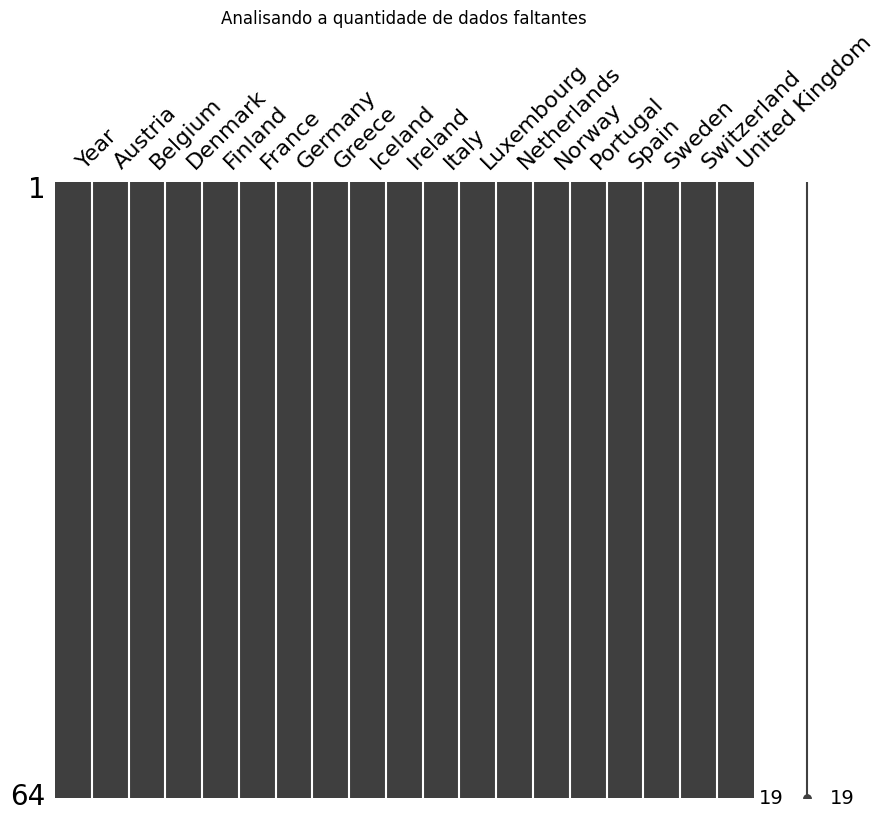

In [ ]:
msno.matrix(df, figsize=(10,8))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Não há dados faltantes, nulos. Portanto, não é necessário realizar tratamento desse aspecto.

In [ ]:
df['Year'].value_counts()

,count
Year,
1960,1
1961,1
1994,1
1995,1
1996,1
...,...
1986,1
1987,1
1988,1


In [ ]:
df['Germany'].describe()

,Germany
count,6.400000e+01
mean,1.857701e+12
std,1.414252e+12
min,8.431095e+10
25%,5.124748e+11
50%,1.907370e+12
75%,3.368110e+12
max,4.456080e+12


In [ ]:
def max_value_by_column(df):
    # Excluir a coluna 'Year' para não ser considerada
    df_without_year = df.drop('Year', axis=1)

    # Encontrar o valor máximo de cada coluna
    max_values = df_without_year.max()

    # Encontrar o ano correspondente ao valor máximo de cada coluna, utilizando o valor de 'Year'
    years_with_max_values = []
    for column in df_without_year.columns:
        # Encontra o valor máximo e o ano correspondente
        max_value_row = df[df[column] == df[column].max()]
        year_of_max_value = max_value_row['Year'].values[0]
        years_with_max_values.append(year_of_max_value)

    # Criar um DataFrame com o valor máximo e o ano correspondente
    result = pd.DataFrame({
        'Max Value': max_values,
        'Year with Max Value': years_with_max_values
    })

    # Ordenar pelo valor máximo em ordem decrescente
    result_sorted = result.sort_values(by='Max Value', ascending=False)

    return result_sorted

# Chamar a função e exibir o resultado
result = max_value_by_column(df)
print(result)


                   Max Value  Year with Max Value
Germany         4.456080e+12                 2023
mv_avg          4.118792e+12                 2023
mv_avg_15       3.786464e+12                 2023
United Kingdom  3.340030e+12                 2023
mv_avg_30       3.167721e+12                 2023
France          3.030900e+12                 2023
Italy           2.408660e+12                 2008
mv_avg_60       1.974917e+12                 2023
Spain           1.631860e+12                 2008
Netherlands     1.118120e+12                 2023
Switzerland     8.849400e+11                 2023
Sweden          6.397150e+11                 2021
Belgium         6.322170e+11                 2023
Norway          5.937270e+11                 2022
Ireland         5.456290e+11                 2023
Austria         5.160340e+11                 2023
Denmark         4.056880e+11                 2021
Greece          3.559090e+11                 2008
Finland         3.001870e+11                 2023


De acordo com os dados analisados, os maiores Produtos Internos Brutos da Europa vieram da Alemanha (2023), Reino Unido (2023), França (2023), Italia (2008) e Espanha (2008). A alemanha foi a grande produtora, com quatro trilhões, quatrocentos e cinquenta e seis bilhões e oitenta milhões.E os menores Produtos Internos Brutos da Europa vieram da Greece (2008), Finland (2023), Portugal (2023), Luxembourg (2023) e Iceland (2023). Portanto, ocorreu a análise econômica da série Temporal anual Discreta (1960 a 2023), pois observações foram tecidas em pontos de tempo fixos e regulares.

Serão analisados os Top 5 paises com maiores GDP - produtos interno Bruto na Europa e Top 5 paises com menores GDP na Europa.

# **4. Visualizações dos Dados**

# **4.1 Gráficos de Linha**

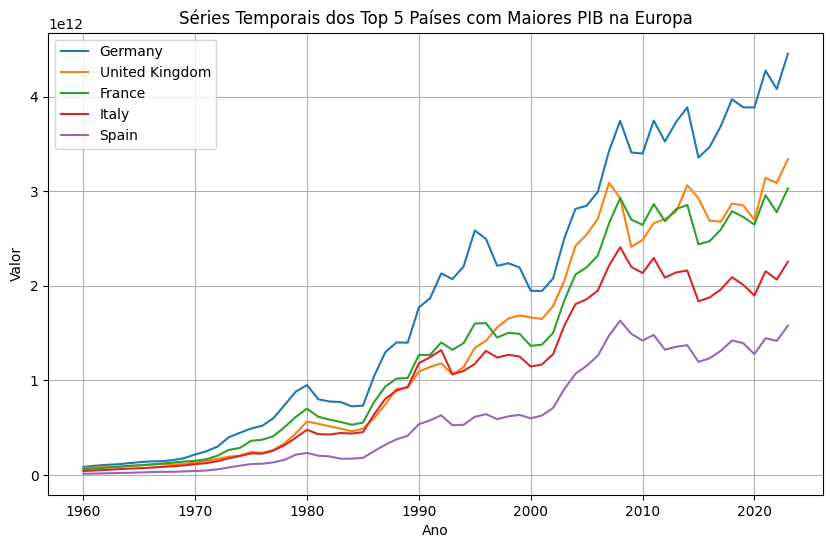

In [ ]:
# Séries Temporais dos Top 5 Países com Maiores PIB na Europa
def plot_time_series(df):
    # Filtrar os dados para as colunas específicas
    columns_to_plot = ['Year', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain']

    # Selecionar apenas as colunas de interesse
    df_plot = df[columns_to_plot]

    # Criar uma figura e um conjunto de subgráficos
    plt.figure(figsize=(10, 6))

    # Plotar cada série temporal
    for column in columns_to_plot[1:]:  # Ignorar 'Year', que é o eixo X
        plt.plot(df_plot['Year'], df_plot[column], label=column)

    # Adicionar título e rótulos
    plt.title('Séries Temporais dos Top 5 Países com Maiores PIB na Europa')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.legend()

    # Mostrar o gráfico
    plt.grid(True)
    plt.show()

# Chamar a função para exibir o gráfico
plot_time_series(df)

Os 5 países com maiores GDP (PIBs) apresentaram uma tendência positiva de crescimento entre os anos de 1960 a 2008, com algumas desacelerações/ recessões, como em 1982. Depois ocorreram alguns ciclos oscilatórios na economia: desaceleração, recessão e crescimento econômico.Entre 2008-2010, por exemplo, uma grave recessão acometeu o globo (colapso do mercado imobiliário dos Estados Unidos, crise financeira de 2007-2008 e crise das hipotecas subprime) e em 2020 devido a pandemia do COVID-19.

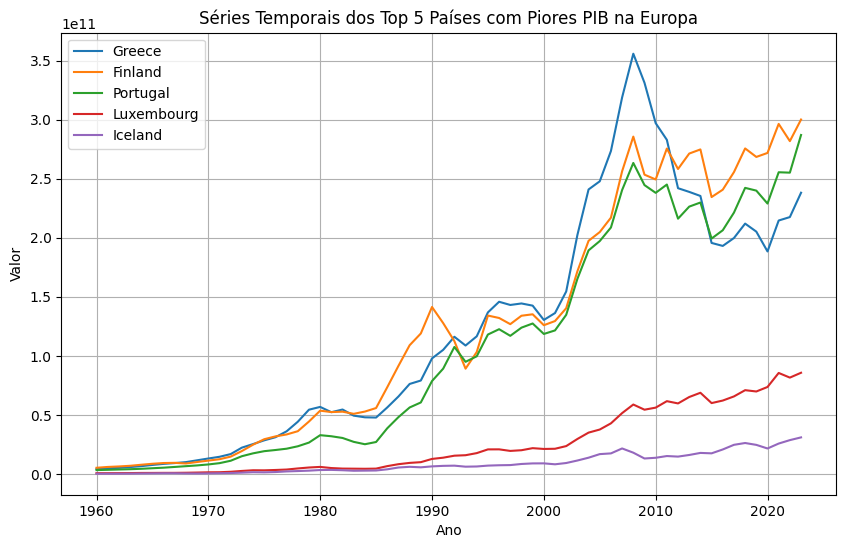

In [ ]:
# Séries Temporais dos Top 5 Países com Piores GDP- PIBs na Europa

def plot_time_series(df):
    # Filtrar os dados para as colunas específicas
    columns_to_plot = ['Year', 'Greece', 'Finland', 'Portugal', 'Luxembourg', 'Iceland']

    # Selecionar apenas as colunas de interesse
    df_plot = df[columns_to_plot]

    # Criar uma figura e um conjunto de subgráficos
    plt.figure(figsize=(10, 6))

    # Plotar cada série temporal
    for column in columns_to_plot[1:]:  # Ignorar 'Year', que é o eixo X
        plt.plot(df_plot['Year'], df_plot[column], label=column)

    # Adicionar título e rótulos
    plt.title('Séries Temporais dos Top 5 Países com Piores PIB na Europa')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.legend()

    # Mostrar o gráfico
    plt.grid(True)
    plt.show()

# Chamar a função para exibir o gráfico
plot_time_series(df)

Todos os cinco países com os piores PIBs da Europa apresentaram recessão econômica em 2020, como pode ser observado no gráfico. Entretanto, esses países, incluindo a Grécia, conhecida por seus problemas financeiros, estão conseguindo superar a recessão e voltando a crescer. E Iceland é o país com menor PIB da Europa, talvez por ser um dos países menos densamente povoados da Europa.

# **4.2 Heatmap**

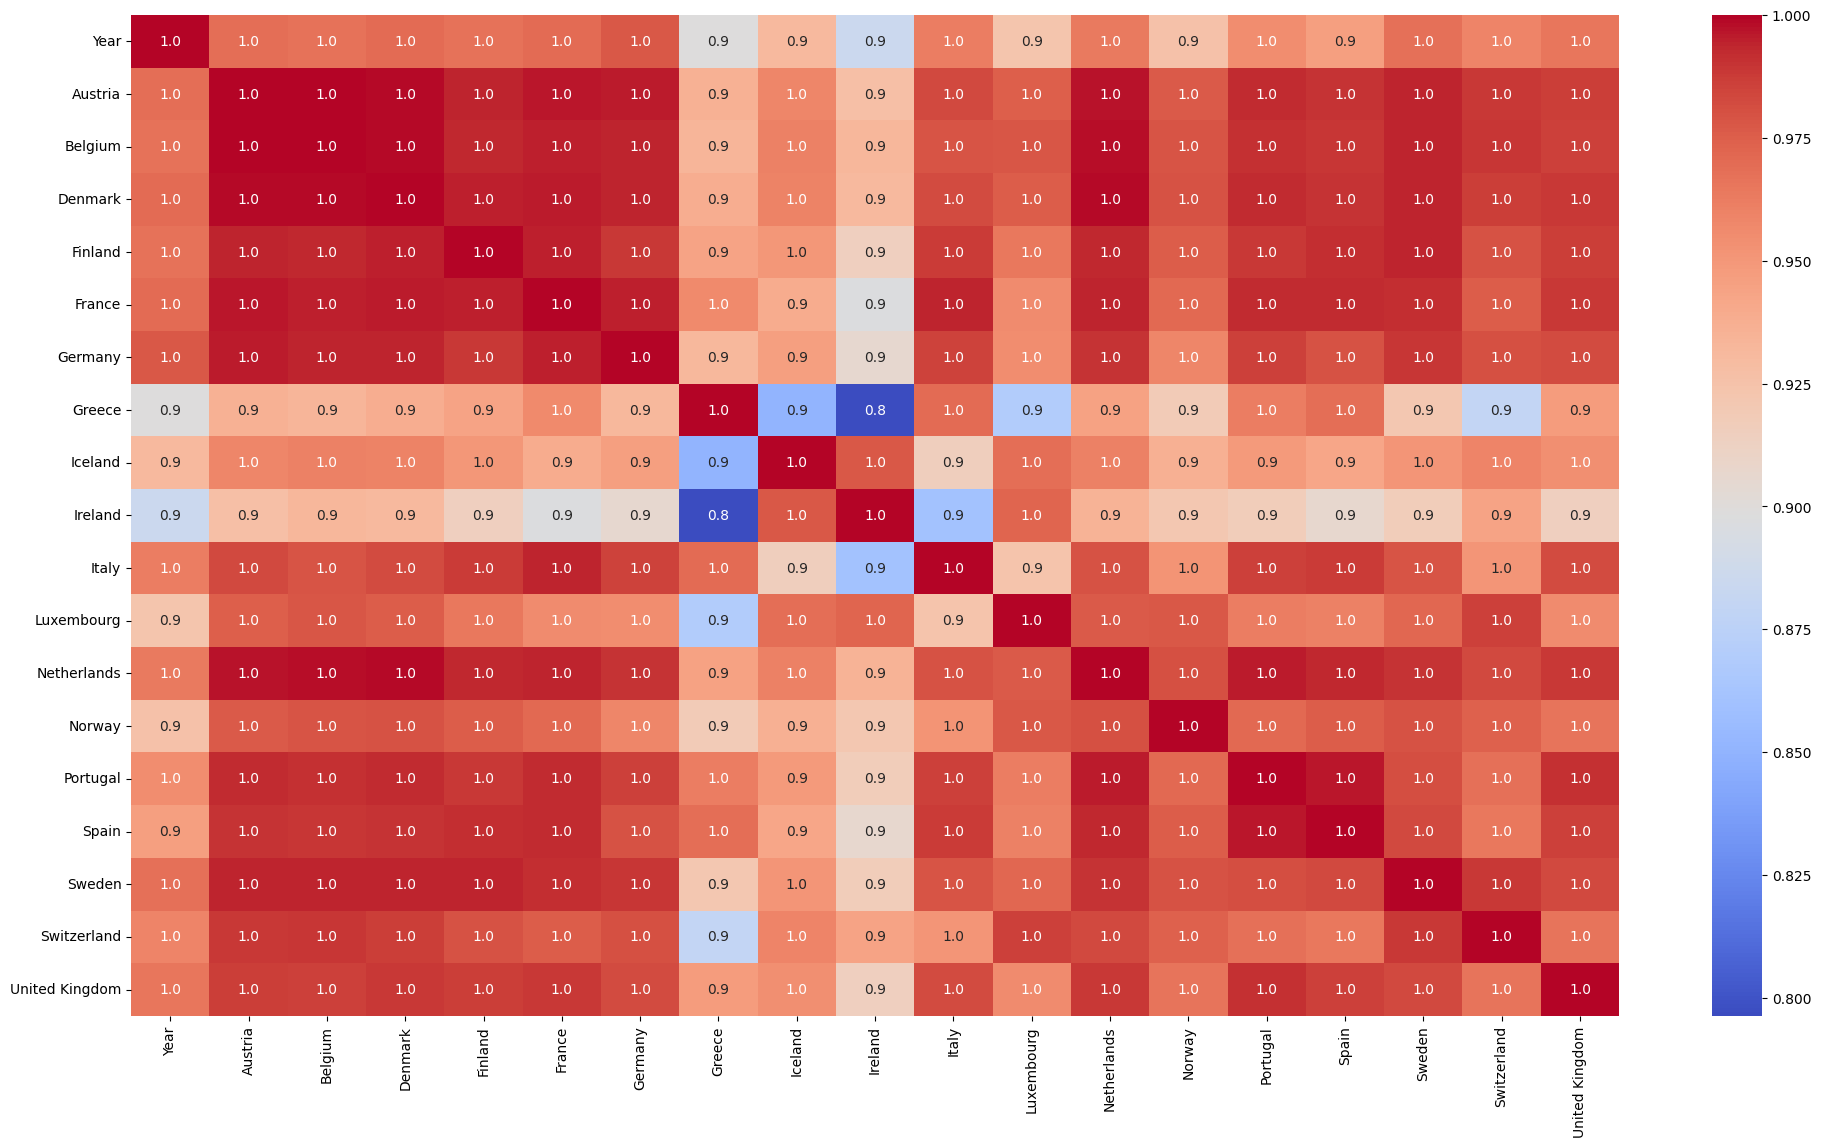

In [ ]:
# Heatmap
plt.figure(figsize=(24, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

Os  PIBs com menores correlações foram Grécia e Irlanda. Abaixo será plotado um gráfico para observar tal comportamento.

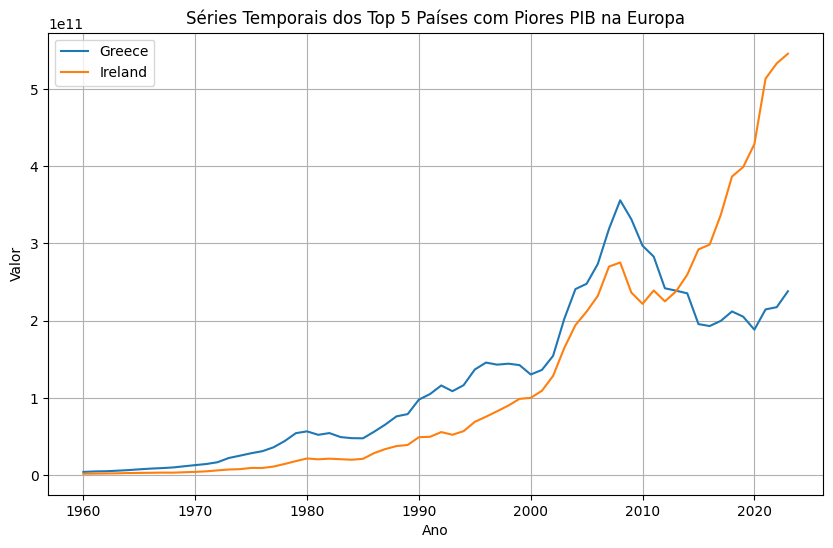

In [ ]:
def plot_time_series(df):
    # Filtrar os dados para as colunas específicas
    columns_to_plot = ['Year', 'Greece', 'Ireland']

    # Selecionar apenas as colunas de interesse
    df_plot = df[columns_to_plot]

    # Criar uma figura e um conjunto de subgráficos
    plt.figure(figsize=(10, 6))

    # Plotar cada série temporal
    for column in columns_to_plot[1:]:  # Ignorar 'Year', que é o eixo X
        plt.plot(df_plot['Year'], df_plot[column], label=column)

    # Adicionar título e rótulos
    plt.title('Séries Temporais dos Top 5 Países com Piores PIB na Europa')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.legend()

    # Mostrar o gráfico
    plt.grid(True)
    plt.show()

# Chamar a função para exibir o gráfico
plot_time_series(df)

É possível observar que entre 1960 e 2012, os dois países apresentavam comportamentos semelhantes no crescimento e declínio do GDP (PIB).

Em 2008, a Grécia começou a enfrentar uma grande crise, o que levou muitos investidores a não emprestarem dinheiro ao país, que já tinha uma dívida alta. Ademais, a economia passou a crescer menos, houve queda na arrecadação de impostos e o governo grego precisou aumentar os gastos sociais. O declínio do PIB da Grécia a partir de 2008 pode ser observado nesse gráfico, com pequenas oscilações entre declínio e crescimento a partir de 2015.

A Irlanda, por sua vez, de 1995 a 2007 teve um crescimento rápido, beneficiando-se do aumento dos gastos dos consumidores, da construção e do investimento empresarial. No entanto, em 2008, a crise no mercado imobiliário afetou a economia do país, cujo PIB caiu acentuadamente e o país entrou em recessão pela primeira vez em mais de uma década. Após várias reformas econômicas com o objetivo redução do déficit orçamentário e da dívida governamental, o PIB começou a crescer em 2010 e, após três trimestres de contração em 2012, conquistou um acentuado crescimento.

Portanto, é intenso o crescimento do PIB da Irlanda a partir de 2012, ao contrário do PIB da Grécia que desde 2008 teve um grande declínio.

# **4.3 Média Móvel**

In [ ]:
def create_mv_avg(df, mv_size):
  return df.rolling(mv_size).mean().values

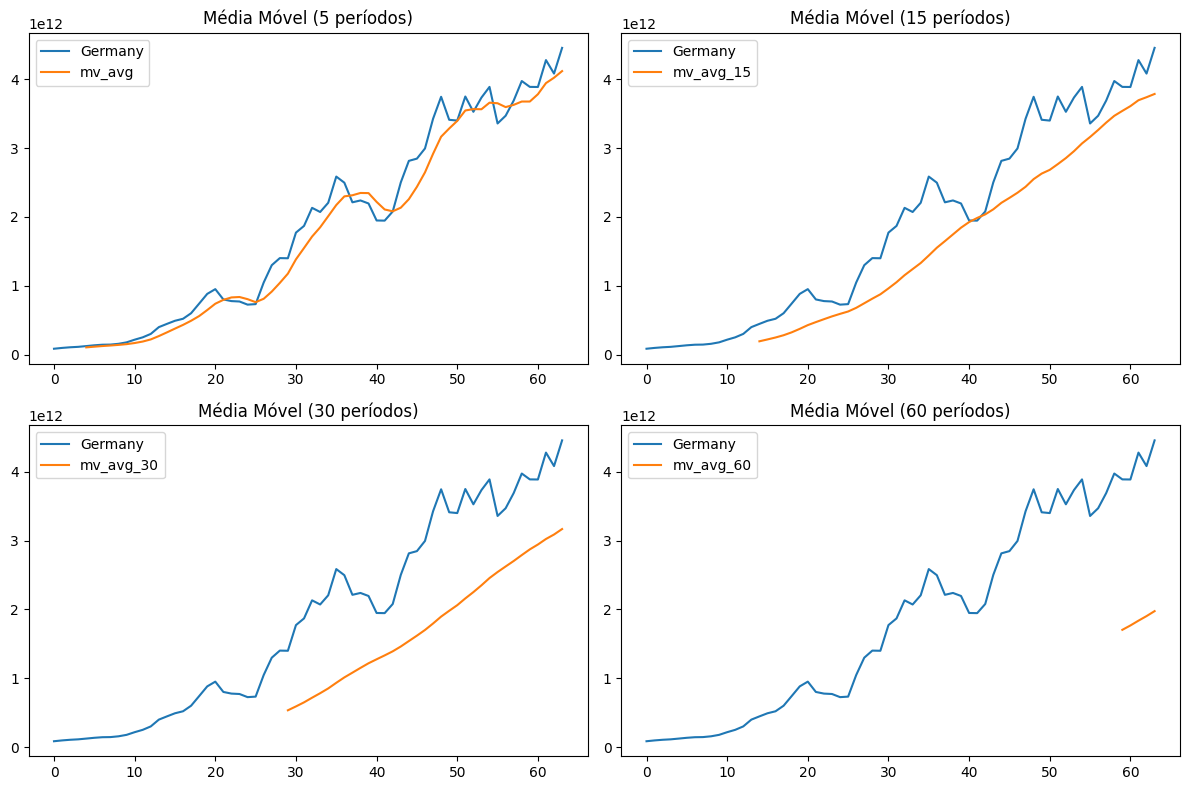

In [ ]:
# Subgráfico para 5 períodos
mv_size = 5
df["mv_avg"] = create_mv_avg(df["Germany"], mv_size)

# Subgráfico para 15 períodos
mv_size_15 = 15
df["mv_avg_15"] = create_mv_avg(df["Germany"], mv_size_15)

# Subgráfico para 30 períodos
mv_size_30 = 30
df["mv_avg_30"] = create_mv_avg(df["Germany"], mv_size_30)

# Subgráfico para 60 períodos
mv_size_60 = 60
df["mv_avg_60"] = create_mv_avg(df["Germany"], mv_size_60)

# Criar a figura com 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Ajustando o tamanho da figura

# Plotando o primeiro gráfico (mv_size = 5)
df[["Germany", "mv_avg"]].plot(ax=axs[0, 0], title="Média Móvel (5 períodos)", legend=True)

# Plotando o segundo gráfico (mv_size = 15)
df[["Germany", "mv_avg_15"]].plot(ax=axs[0, 1], title="Média Móvel (15 períodos)", legend=True)

# Plotando o terceiro gráfico (mv_size = 30)
df[["Germany", "mv_avg_30"]].plot(ax=axs[1, 0], title="Média Móvel (30 períodos)", legend=True)

# Plotando o quarto gráfico (mv_size = 60)
df[["Germany", "mv_avg_60"]].plot(ax=axs[1, 1], title="Média Móvel (60 períodos)", legend=True)

# Exibir os gráficos
plt.tight_layout()  # Ajusta os gráficos para que fiquem bem distribuídos
plt.show()

A média móvel (moving average) é uma técnica utilizada para suavizar uma série temporal, eliminando flutuações de curto prazo e ajudando a destacar tendências de médio e longo prazo ou padrões subjacentes.

Nos gráficos plotados, a série original chamada Germany tem 63 anos, portanto, há 63 pontos de dados nos gráficos.

Com a janela de 5 anos (5 períodos), a média móvel de cada ponto é calculada considerando os 5 anos anteriores. Isso cria uma suavização que ajuda a visualizar tendências de curto prazo, mas ainda reage a flutuações anuais por ser sensível às flutuações de curto prazo.

Com a janela de 15 anos (15 períodos), a média móvel é mais suave, refletindo melhor as tendências de médio prazo e ignorando as flutuações menores de um ano. Esse período  é bom para analisar ciclos econômicos.

As janelas de 30 e 60 anos (30 e 60 períodos) ajudam a visualizar tendências de longo prazo, suavizam as variações de curto e médio prazo e refletem as tendências duradouras a longo prazo. Portanto, respondem de forma lenta as mudanças bruscas nos dados, destacando as tendências globais e duradouras.

# **4.4 Auto Correlação e Auto Correlação Parcial**

<Figure size 800x600 with 0 Axes>

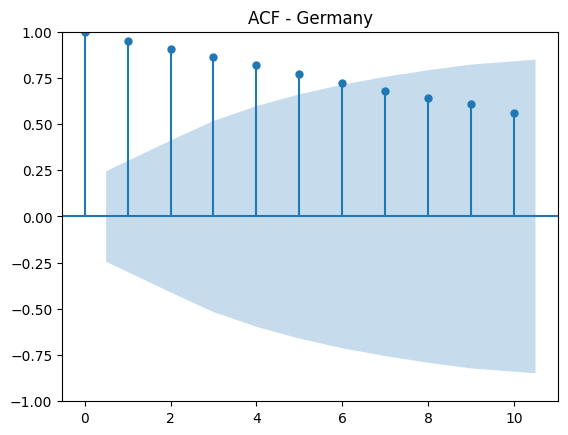

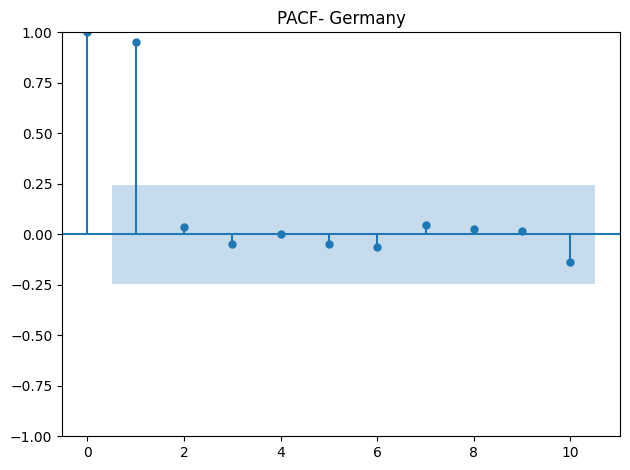

In [ ]:
# Criar a figura para o gráfico de ACF
plt.figure(figsize=(8, 6))  # Tamanho do gráfico

# Plotando a autocorrelação para a série temporal da Alemanha
plot_acf(df["Germany"], lags=10)

# Adicionando título ao gráfico
plt.title("ACF - Germany")

# Plotando a autocorrelação Parcial para a série temporal da Alemanha
plot_pacf(df["Germany"], lags=10)

# Adicionando título ao gráfico
plt.title("PACF- Germany")

# Exibindo o gráfico
plt.tight_layout()
plt.show()

A ACF (Autocorrelação) mede a correlação de uma série temporal consigo mesma em diferentes defasagens (lags). Lag é o número de período de tempo para o qual se retrocede o período na série temporal.No gráfico em análise, foi colocado lag 10 para comparar o valor de um ano com o valor de 10 anos atrás, o que pode ser interessante para detectar ciclos ou correlações de longo prazo.

No gráfico em análise, há uma queda gradual nas correlações, o que  sugereria um processo AR (Auto-regressivo) de ordem maior e que há uma dependência de longo prazo.

O PACF (Autocorrelação Parcial) também mede a correlação, mas com a diferença que tira a influência das defasagens intermediárias. Isto é, demonstra-se a correlação direta entre um valor e outro após controlar as defasagens intermediárias.

Sobre a sombra, a autocorrelação ultrapassou a sombra (barra de confiança) em alguns momentos, o que indica que existe uma dependência significativa (indicativo para modelos AR ou MA). Por outro lado, quando a autocorrelação está dentro da sombra, isso sugere que a autocorrelação para aquele lag não é significativa e que o valor observado pode ser devido ao acaso.

# **4.5 Teste KPSS - Verificação Estacionária - Diferenciação**

In [ ]:
# Criando uma instância do KPSSTest
kpss = KPSSTest()



In [ ]:

# Extração das séries temporais específicas para cada país
germany_series = df["Germany"]
uk_series = df["United Kingdom"]
france_series = df["France"]
italy_series = df["Italy"]
spain_series = df["Spain"]

# Verificação se as séries precisam ser diferenciadas (com base no teste KPSS)
germany_kpss = kpss.should_diff(germany_series)
uk_kpss = kpss.should_diff(uk_series)
france_kpss = kpss.should_diff(france_series)
italy_kpss = kpss.should_diff(italy_series)
spain_kpss = kpss.should_diff(spain_series)

print(germany_kpss)
print(uk_kpss)
print(france_kpss)
print(italy_kpss)
print(spain_kpss)

# Imprimindo os resultados para cada país
print(f"Germany precisa ser diferenciada? {'Sim' if germany_kpss else 'Não'}")
print(f"United Kingdom precisa ser diferenciada? {'Sim' if uk_kpss else 'Não'}")
print(f"France precisa ser diferenciada? {'Sim' if france_kpss else 'Não'}")
print(f"Italy precisa ser diferenciada? {'Sim' if italy_kpss else 'Não'}")
print(f"Spain precisa ser diferenciada? {'Sim' if spain_kpss else 'Não'}")

(0.01, True)
(0.01, True)
(0.01, True)
(0.01, True)
(0.01, True)
Germany precisa ser diferenciada? Sim
United Kingdom precisa ser diferenciada? Sim
France precisa ser diferenciada? Sim
Italy precisa ser diferenciada? Sim
Spain precisa ser diferenciada? Sim


As séries são estacionárias, pois os p-values são menores que 0.05. Logo, é importante realizar diferenciações, como dito no texto.


In [ ]:
# Função de diferenciação da série temporal
def get_diff(tseries, m=1):
  diffs = []
  for t in range(m, len(tseries)):
    diffs.append(tseries.values[t] - tseries.values[t - m])

  return pd.DataFrame({f"Diff(m={m})": diffs})

**Diferenciação e Verificação das Séries**

<Axes: >

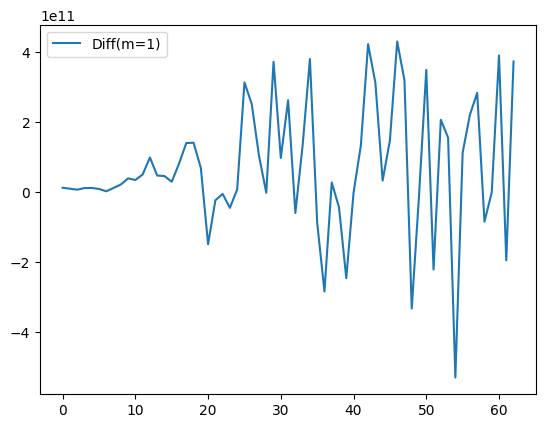

In [ ]:
# Aplicação para Série Germany
germany_diff = get_diff(germany_series)
germany_diff.plot()

In [ ]:
# verificação da estacionariedade da série já diferenciada.
print(f"Germany_diff KPSS Test = {kpss.should_diff(germany_diff)}")

Germany_diff KPSS Test = (0.1, False)


Portanto, a série Germany foi efetivamente diferenciada. Tal atividade será realizada para as demais.

UK_diff KPSS Test = (0.1, False)


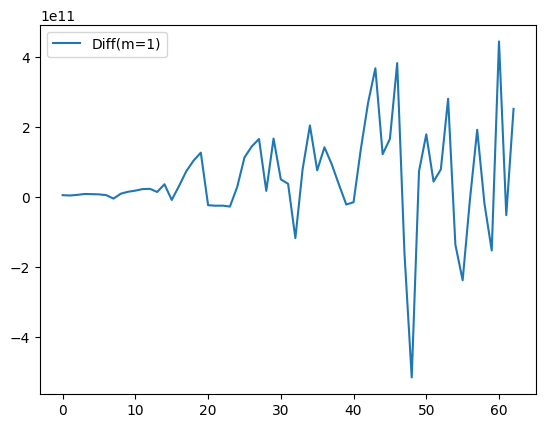

In [ ]:
# Aplicação para Série UK
uk_diff = get_diff(uk_series)
uk_diff.plot()
# verificação da estacionariedade da série já diferenciada.
print(f"UK_diff KPSS Test = {kpss.should_diff(uk_diff)}")

Portanto, a série UK foi efetivamente diferenciada.

France_diff KPSS Test = (0.1, False)


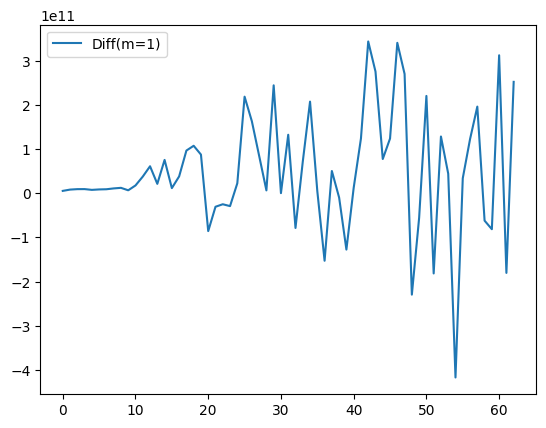

In [ ]:
# Aplicação para Série France
france_diff = get_diff(france_series)
france_diff.plot()
# verificação da estacionariedade da série já diferenciada.
print(f"France_diff KPSS Test = {kpss.should_diff(france_diff)}")

Portanto, a série France foi efetivamente diferenciada.

italy_diff KPSS Test = (0.1, False)


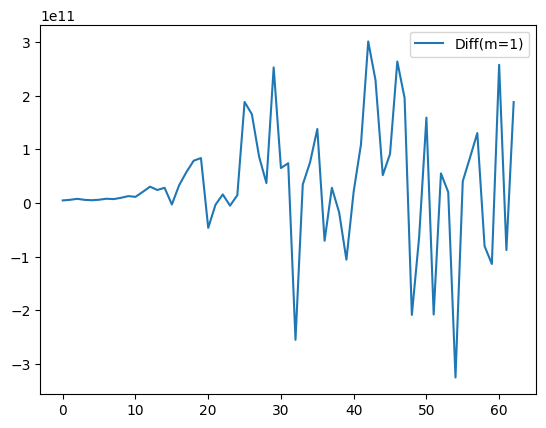

In [ ]:
# Aplicação para Série Italy
italy_diff = get_diff(italy_series)
italy_diff.plot()
# verificação da estacionariedade da série já diferenciada.
print(f"italy_diff KPSS Test = {kpss.should_diff(italy_diff)}")

Portanto, a série Italy foi efetivamente diferenciada.

spain_diff KPSS Test = (0.1, False)


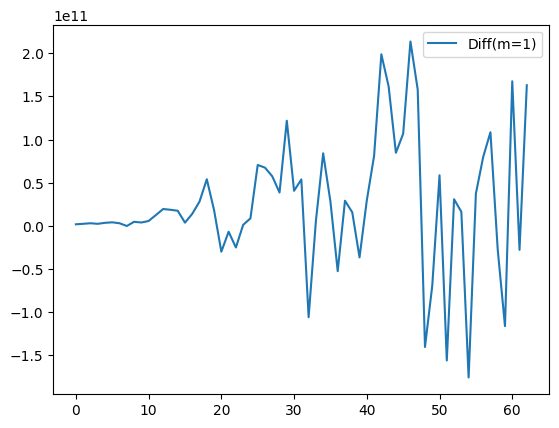

In [ ]:
# Aplicação para Série spain
spain_diff = get_diff(spain_series)
spain_diff.plot()
# verificação da estacionariedade da série já diferenciada.
print(f"spain_diff KPSS Test = {kpss.should_diff(spain_diff)}")

Portanto, a série Spain foi efetivamente diferenciada.

**4.5.1 Diferenças de Diferenciação de Primeira Ordem (m=1) e de Segunda Ordem (m=2)**

<Axes: >

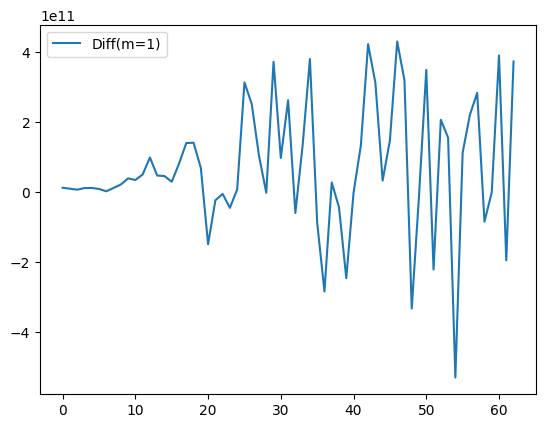

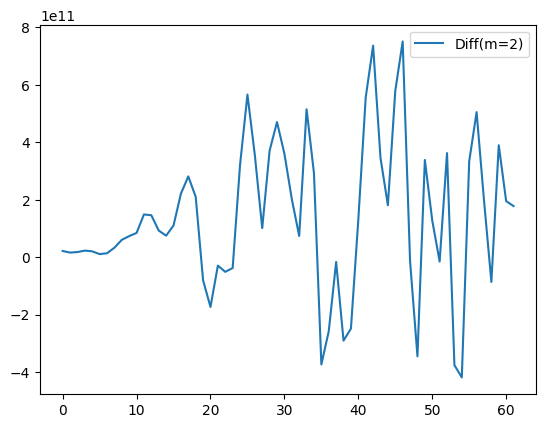

In [ ]:
# Aplicação para Série Germany
germany_diff = get_diff(germany_series)
germany_diff.plot()
germany_diff2 = get_diff(germany_series, m= 2)
germany_diff2.plot()

Plotar gráficos com a diferenciação de primeira ordem (m =1) e de segunda ordem (m =2) é importante, pois cada uma pode contribuir de formas distintas. Podem ser aplicadas outras ordens também.

**Diferenciação de Primeira Ordem (m=1):**

Para cada valor de tempo, é calculado a diferença entre o valor atual e o valor imediatamente anterior. Isso ajuda a remover tendências lineares (crescimento ou decrescimento constante).

**Diferenciação de Segunda Ordem (m=2):**

Para cada valor de tempo, é calculado a diferença entre o valor atual e o valor de dois períodos atrás. Isso é útil quando a série tem uma tendência não linear ou ciclos mais complexos.

A séria temporal do PIB alemão tem tendência linear mas sem crescimento constante. Há oscilações entre crescimento e diminuição do PIB, de modo que m = 1 seria mais interessante. Entretanto, fazer a diferenciação entre as ordens é importante para melhor comparação e aplicação. Também haverá aplicação dessa distinção nos outros 4 países com maiores PIB da União Europeia.

In [ ]:
# verificação da estacionariedade da série já diferenciada.
print(f"germany_diff KPSS Test = {kpss.should_diff(germany_diff)}")
print(f"germany_diff2 KPSS Test = {kpss.should_diff(germany_diff2)}")

germany_diff KPSS Test = (0.1, False)
germany_diff2 KPSS Test = (0.1, False)


UK_diff KPSS Test = (0.1, False)
UK_diff2 KPSS Test = (0.1, False)


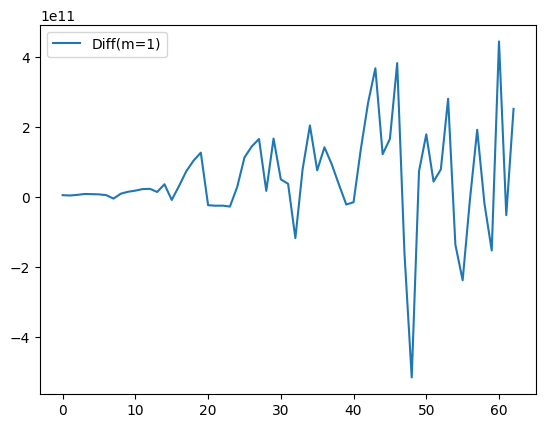

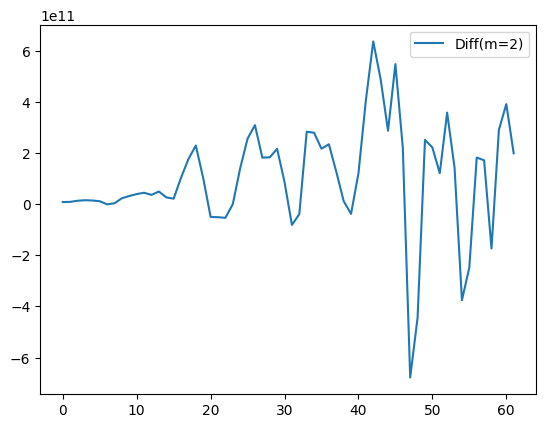

In [ ]:
#Aplicação para Série UK
uk_diff = get_diff(uk_series)
uk_diff.plot()
uk_diff2 = get_diff(uk_series, m= 2)
uk_diff2.plot()
# verificação da estacionariedade da série já diferenciada.
print(f"UK_diff KPSS Test = {kpss.should_diff(uk_diff)}")
print(f"UK_diff2 KPSS Test = {kpss.should_diff(uk_diff2)}")

France_diff KPSS Test = (0.1, False)
France_diff2 KPSS Test = (0.1, False)


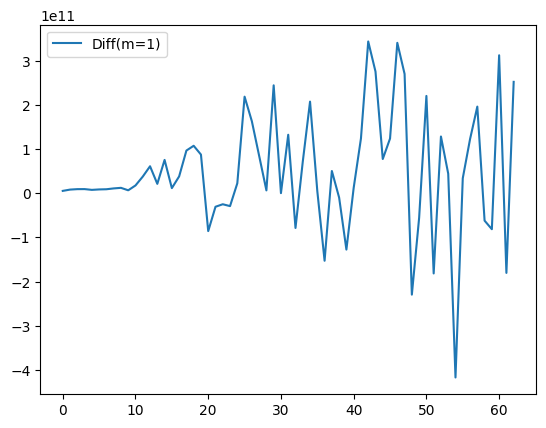

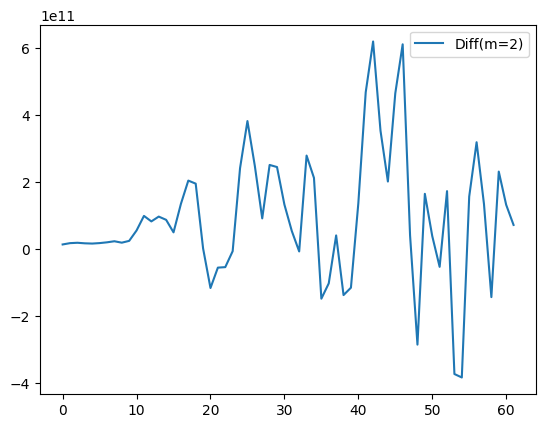

In [ ]:
# Aplicação para Série France
france_diff = get_diff(france_series)
france_diff.plot()
france_diff2 = get_diff(france_series, m =2)
france_diff2.plot()
# verificação da estacionariedade da série já diferenciada.
print(f"France_diff KPSS Test = {kpss.should_diff(france_diff)}")
print(f"France_diff2 KPSS Test = {kpss.should_diff(france_diff2)}")

italy_diff KPSS Test = (0.1, False)
italy_diff2 KPSS Test = (0.1, False)


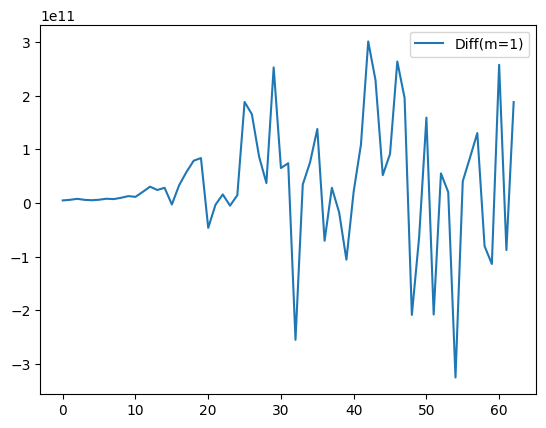

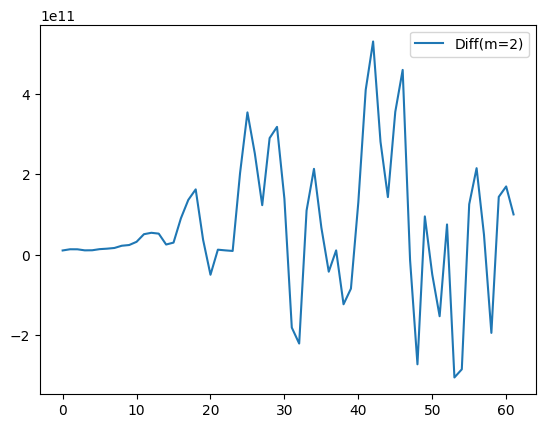

In [ ]:
# Aplicação para Série Italy
italy_diff = get_diff(italy_series)
italy_diff.plot()
italy_diff2 = get_diff(italy_series, m =2)
italy_diff2.plot()
# verificação da estacionariedade da série já diferenciada.
print(f"italy_diff KPSS Test = {kpss.should_diff(italy_diff)}")
print(f"italy_diff2 KPSS Test = {kpss.should_diff(italy_diff2)}")

spain_diff KPSS Test = (0.1, False)
spain_diff2 KPSS Test = (0.1, False)


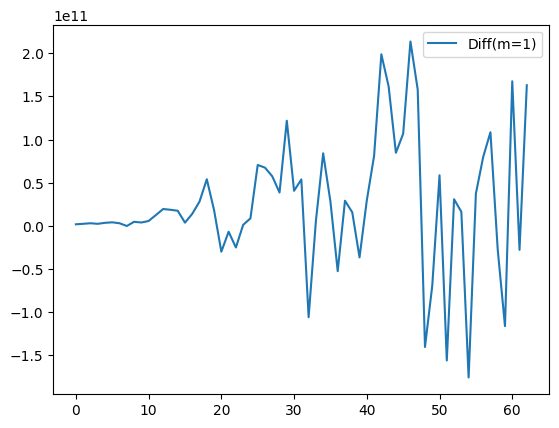

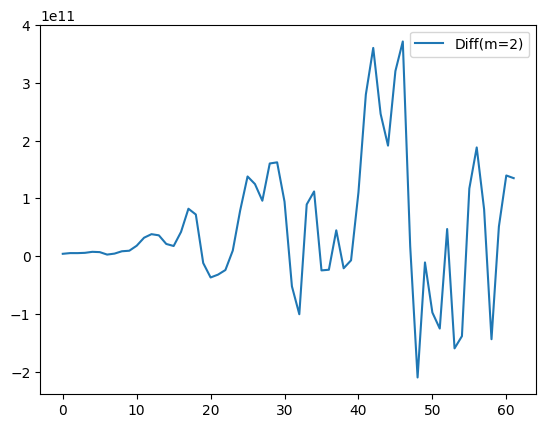

In [ ]:
# Aplicação para Série spain
spain_diff = get_diff(spain_series)
spain_diff.plot()
spain_diff2 = get_diff(spain_series, m =2)
spain_diff2.plot()
# verificação da estacionariedade da série já diferenciada.
print(f"spain_diff KPSS Test = {kpss.should_diff(spain_diff)}")
print(f"spain_diff2 KPSS Test = {kpss.should_diff(spain_diff2)}")

# **4.6 Correlação dos TOP 5 maiores GDP- PIB da Europa**

Antes houve a correlação e correlação parcial da Série Temporal Germany, com dados estacionários. Agora ocorrerá a correlação parcial e depois correlação dos Top 5 maiores GDP - PIB da Europa, com as séries temporais já diferenciadas.

**4.6.1 Correlação Parcial dos Top 5 maiores GDP-PIB**

<Figure size 1000x600 with 0 Axes>

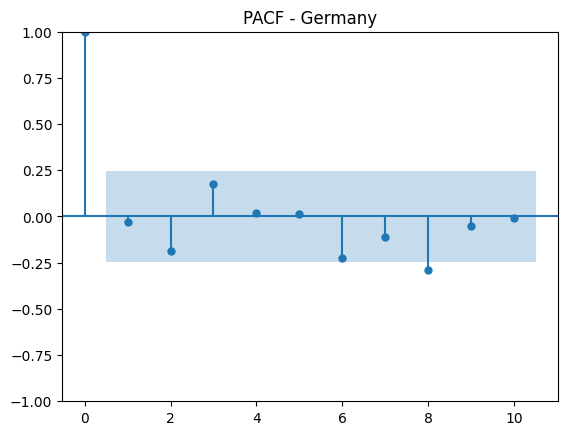

<Figure size 1000x600 with 0 Axes>

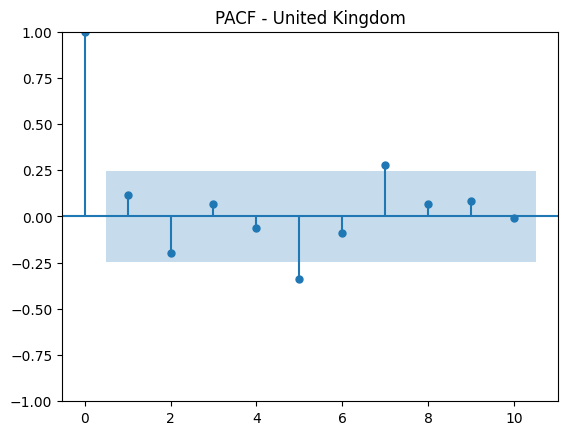

<Figure size 1000x600 with 0 Axes>

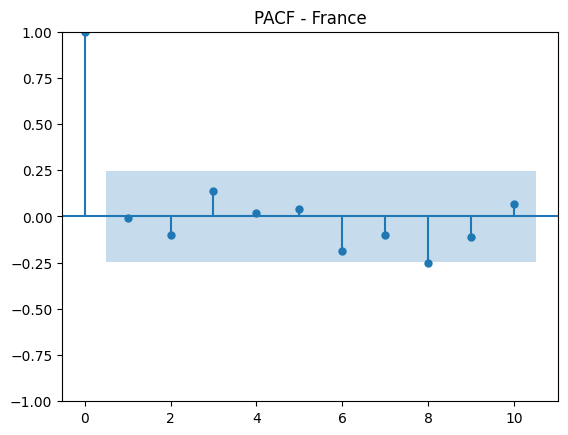

<Figure size 1000x600 with 0 Axes>

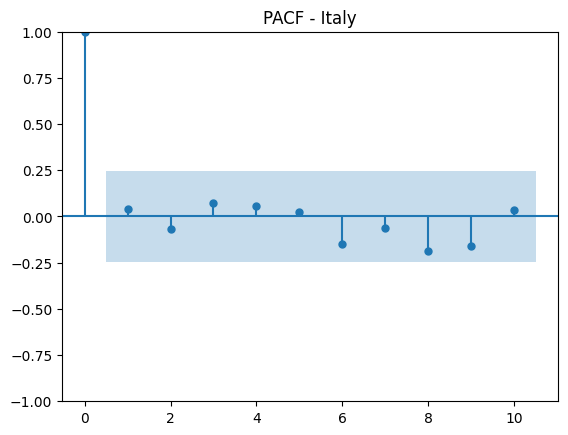

<Figure size 1000x600 with 0 Axes>

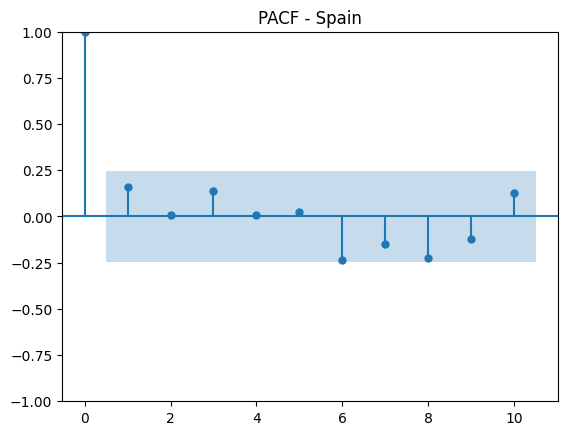

In [ ]:
# Plotando a correlação parcial para a Alemanha (germany_diff)
plt.figure(figsize=(10, 6))
plot_pacf(germany_diff, lags=10)
plt.title("PACF - Germany")
plt.show()

# Plotando a correlação parcial para o Reino Unido (uk_diff)
plt.figure(figsize=(10, 6))
plot_pacf(uk_diff, lags=10)
plt.title("PACF - United Kingdom")
plt.show()

# Plotando a correlação parcial para a França (france_diff)
plt.figure(figsize=(10, 6))
plot_pacf(france_diff, lags=10)
plt.title("PACF - France")
plt.show()

# Plotando a correlação parcial para a Itália (italy_diff)
plt.figure(figsize=(10, 6))
plot_pacf(italy_diff, lags=10)
plt.title("PACF - Italy")
plt.show()

# Plotando a correlação parcial para a Espanha (spain_diff)
plt.figure(figsize=(10, 6))
plot_pacf(spain_diff, lags=10)
plt.title("PACF - Spain")
plt.show()

**4.6.2 Correlação dos Top 5 maiores PIB da Europa -lags=10**

<Figure size 1000x600 with 0 Axes>

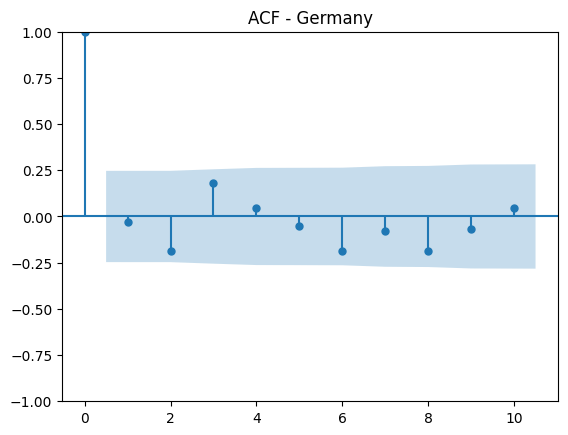

<Figure size 1000x600 with 0 Axes>

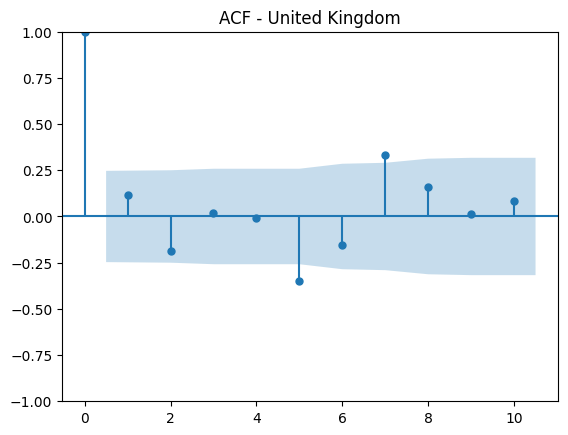

<Figure size 1000x600 with 0 Axes>

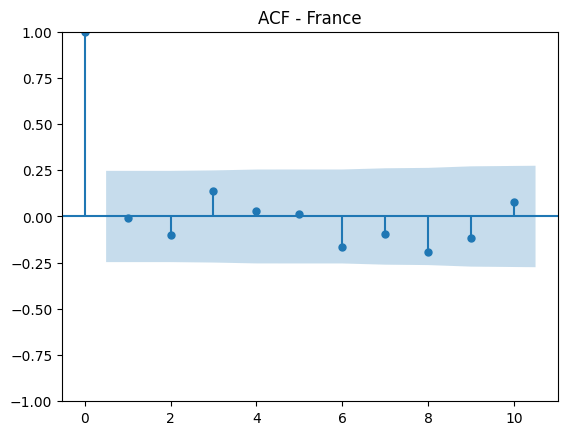

<Figure size 1000x600 with 0 Axes>

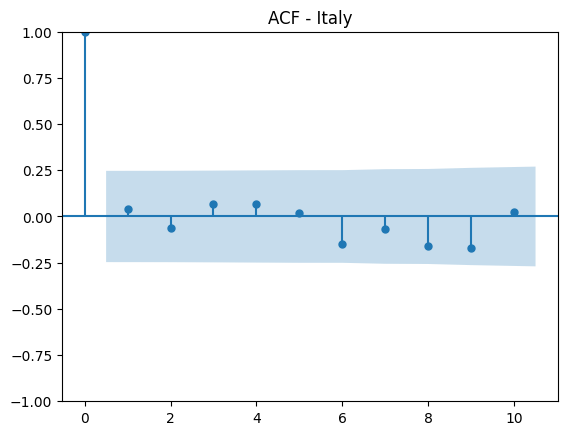

<Figure size 1000x600 with 0 Axes>

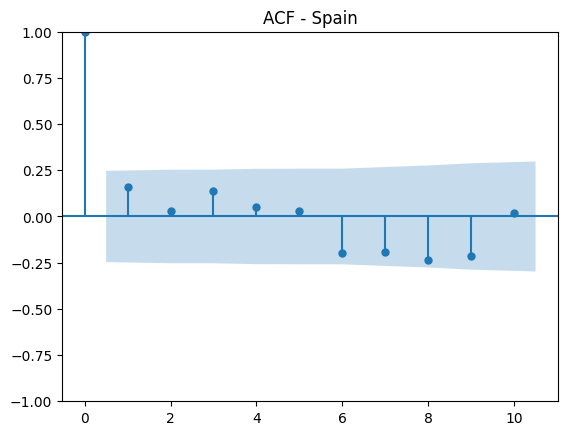

In [ ]:

# Plotando a correlação para a Alemanha (germany_diff)
plt.figure(figsize=(10, 6))
plot_acf(germany_diff, lags=10)
plt.title("ACF - Germany")
plt.show()

# Plotando a correlação para o Reino Unido (uk_diff)
plt.figure(figsize=(10, 6))
plot_acf(uk_diff, lags=10)
plt.title("ACF - United Kingdom")
plt.show()

# Plotando a correlação para a França (france_diff)
plt.figure(figsize=(10, 6))
plot_acf(france_diff, lags=10)
plt.title("ACF - France")
plt.show()

# Plotando a correlação para a Itália (italy_diff)
plt.figure(figsize=(10, 6))
plot_acf(italy_diff, lags=10)
plt.title("ACF - Italy")
plt.show()

# Plotando a correlação para a Espanha (spain_diff)
plt.figure(figsize=(10, 6))
plot_acf(spain_diff, lags=10)
plt.title("ACF - Spain")
plt.show()

**4.6.3 Correlação dos Top 5 maiores PIB da Europa - lags=20**

<Figure size 1000x600 with 0 Axes>

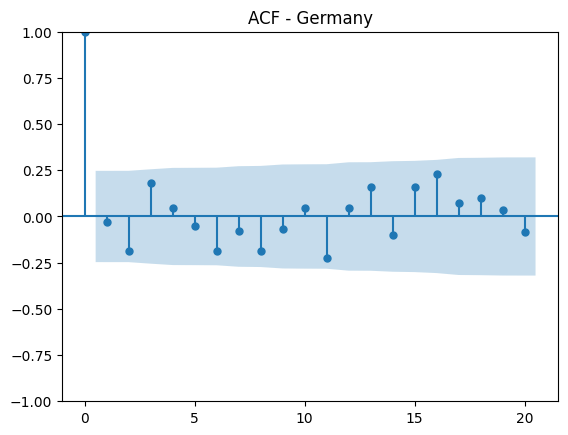

<Figure size 1000x600 with 0 Axes>

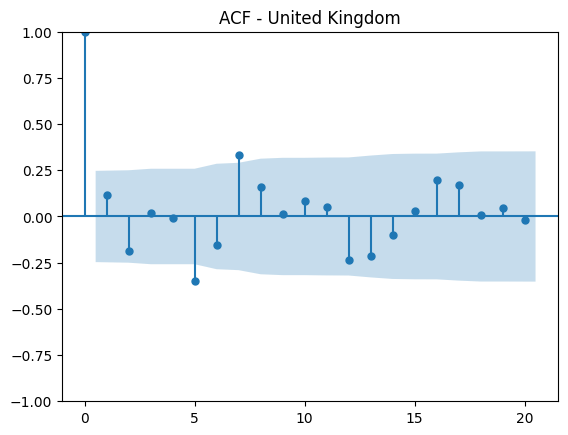

<Figure size 1000x600 with 0 Axes>

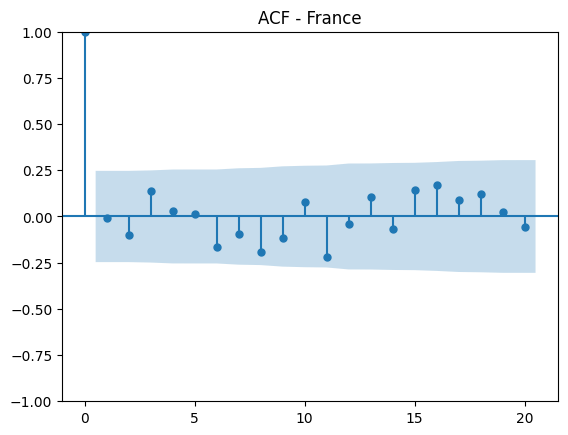

<Figure size 1000x600 with 0 Axes>

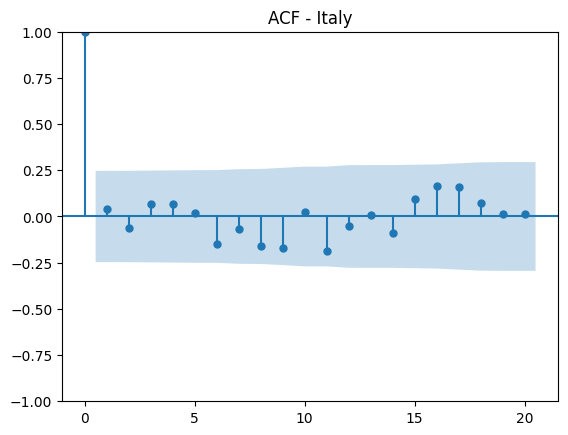

<Figure size 1000x600 with 0 Axes>

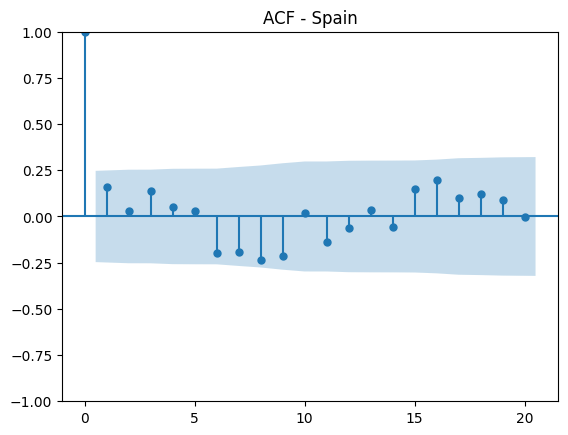

In [ ]:
# Plotando a correlação para a Alemanha (germany_diff)
plt.figure(figsize=(10, 6))
plot_acf(germany_diff, lags=20)
plt.title("ACF - Germany")
plt.show()

# Plotando a correlação para o Reino Unido (uk_diff)
plt.figure(figsize=(10, 6))
plot_acf(uk_diff, lags=20)
plt.title("ACF - United Kingdom")
plt.show()

# Plotando a correlação para a França (france_diff)
plt.figure(figsize=(10, 6))
plot_acf(france_diff, lags=20)
plt.title("ACF - France")
plt.show()

# Plotando a correlação para a Itália (italy_diff)
plt.figure(figsize=(10, 6))
plot_acf(italy_diff, lags=20)
plt.title("ACF - Italy")
plt.show()

# Plotando a correlação para a Espanha (spain_diff)
plt.figure(figsize=(10, 6))
plot_acf(spain_diff, lags=20)
plt.title("ACF - Spain")
plt.show()

# **5. Modelos**

In [ ]:
# Divisão da Série Temporal do PIB Alemão em Teste e Treino
test_percent = 0.3
horizonte = 2
ts = germany_diff
test_size = int(len(ts) * test_percent)
X_train, X_test = ts[:-(test_size+horizonte-1)], ts[-(test_size+1):]

In [ ]:
# diferentes modelos de previsão baseados em ARIMA
lag = 10 # número de defasagens (lags) que o modelo vai usar para capturar as dependências temporais nos dados (serão utilizados 10 últimos pontos da série para prever os próximos valores)

autoreg_model = AutoReg(X_train, lags=lag)
ma_model = ARIMA(X_train, order=(0, 0, lag))
ar_model = ARIMA(X_train, order=(lag, 0, 0))
arma_model = ARIMA(X_train, order=(lag, 0, lag))

**AutoReg** é um modelo de regressão autorregressivo, que usa os valores passados (lags) de uma série temporal para prever o valor atual.

**ARIMA** é um modelo clássico para séries temporais que incorpora componentes autorregressivos (AR), médias móveis (MA) e diferenciação (I).

**O primeiro modelo ARIMA com ordem (0, 0, lag)** possui
0 para o componente autorregressivo (AR), ou seja, não está utilizando os valores passados diretamente; 0 para a diferenciação (I), o que significa que não há necessidade de diferenciar a série temporal para torná-la estacionária. E lag para o componente de médias móveis (MA), ou seja, os erros passados (ou resíduos) estão sendo usados para melhorar as previsões futuras.

**O segundo modelo ARIMA com ordem (lag, 0, 0)** significa que está configurado para usar o componente autorregressivo (AR) com lag=10 (ou seja, os 10 valores anteriores) para prever os próximos valores, sem usar médias móveis nem diferenciação. Assim, esse modelo é um modelo AR (auto-regressivo puro), que usa apenas os lags da série para a previsão.

**O terceiro modelo ARIMA com ordem (lag, 0, lag),** significa que se usa tanto o componente autorregressivo (AR) com lag=10 como o componente de médias móveis (MA) com lag=10. Não está sendo usada a diferenciação.




In [ ]:
# ajuste do modelo AutoReg aos dados de treinamento e teste
autoreg_results = autoreg_model.fit()
autoreg_preds = autoreg_results.predict(start=len(X_train),
                                        end=len(X_train) + len(X_test) - 1,
                                        dynamic=False)

In [ ]:
# ajuste do modelo Ma aos dados de treinamento e teste
ma_results = ma_model.fit()
ma_preds = ma_results.predict(start=len(X_train),
                              end=len(X_train) + len(X_test) - 1)

In [ ]:
# ajuste do modelo Ar aos dados de treinamento e teste
ar_results = ar_model.fit()
ar_preds = ar_results.predict(start=len(X_train),
                              end=len(X_train) + len(X_test) - 1)

In [ ]:
# ajuste do modelo Arma aos dados de treinamento e teste
arma_results = arma_model.fit()
arma_preds = arma_results.predict(start=len(X_train),
                                  end=len(X_train) + len(X_test) - 1)

# **6. Avaliações dos Modelos**

In [ ]:
# funções para calcular métricas de avaliação de modelos preditivos

def get_mean_squared_error(ground_truth, pred):
  return np.square(np.subtract(ground_truth, pred)).mean()

def get_root_mean_squared_error(ground_truth, pred):
  return np.sqrt(get_mean_squared_error(ground_truth, pred))

def get_mean_absolute_error(ground_truth, pred):
  return np.abs(ground_truth - pred).mean()

def get_mean_absolute_percentage_error(ground_truth, pred):
  return np.abs((ground_truth - pred) / pred).mean() * 100

def get_average_relative_error(ground_truth, pred):
  mean = np.mean(ground_truth)
  sup = np.square(np.subtract(ground_truth, pred)).sum()
  inf = np.square(np.subtract(ground_truth, mean)).sum()

  return sup / inf

def get_metrics(ground_truth, pred):
  mse = get_mean_squared_error(ground_truth, pred)
  rmse = get_root_mean_squared_error(ground_truth, pred)
  mae = get_mean_absolute_error(ground_truth, pred)
  mape = get_mean_absolute_percentage_error(ground_truth, pred)
  avr = get_average_relative_error(ground_truth, pred)

  return {"mse": mse,
          "rmse": rmse,
          "mae": mae,
          "mape": mape,
          "avr": avr}

O **MSE e o RMSE** penalizam erros maiores mais fortemente porque são baseados no quadrado da diferença.

O **MAE** fornece uma medida do erro médio sem penalizar tanto os erros maiores.

O **MAPE** fornece uma medida de erro relativa em termos percentuais, o que é útil quando a escala dos dados pode variar.

O **AVR** mede o erro em relação à média dos dados reais.

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Autoreg
get_metrics(X_test.values.squeeze(), autoreg_preds.values)


{'mse': 1.0500371370262914e+23,
 'rmse': 324042765237.28955,
 'mae': 259237606897.86224,
 'mape': 353.64431951873337,
 'avr': 1.5569767727059856}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo de média móvel (MA)
get_metrics(X_test.values.squeeze(), ma_preds.values)

{'mse': 6.731738506914486e+22,
 'rmse': 259455940516.19797,
 'mae': 216526477151.86703,
 'mape': 402.7153854202884,
 'avr': 0.9981704575591495}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Ar
get_metrics(X_test.values.squeeze(), ar_preds.values)

{'mse': 7.59496279725788e+22,
 'rmse': 275589600624.8763,
 'mae': 229227587441.5601,
 'mape': 434.509186207378,
 'avr': 1.1261678513948135}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Arma
get_metrics(X_test.values.squeeze(), arma_preds.values)

{'mse': 6.803420478498539e+22,
 'rmse': 260833672644.05374,
 'mae': 218661630204.04547,
 'mape': 352.41663410132134,
 'avr': 1.0087993354190519}

In [ ]:
# Verificação de Valores Ausentes
print(f"X_test contains NaN: {X_test.isna().sum()}")
print(f"autoreg_preds contains NaN: {autoreg_preds.isna().sum()}")
print(f"ar_preds contains NaN: {ar_preds.isna().sum()}")
print(f"ma_preds contains NaN: {ma_preds.isna().sum()}")
print(f"arma_preds contains NaN: {arma_preds.isna().sum()}")

X_test contains NaN: Diff(m=1)    0
dtype: int64
autoreg_preds contains NaN: 0
ar_preds contains NaN: 0
ma_preds contains NaN: 0
arma_preds contains NaN: 0


# **7. Comparações dos Modelos**

Autoreg: {'mse': 1.0500371370262914e+23, 'rmse': 324042765237.28955, 'mae': 259237606897.86224, 'mape': 353.64431951873337, 'avr': 1.5569767727059856} 
AR: {'mse': 7.59496279725788e+22, 'rmse': 275589600624.8763, 'mae': 229227587441.5601, 'mape': 434.509186207378, 'avr': 1.1261678513948135} 
MA: {'mse': 6.731738506914486e+22, 'rmse': 259455940516.19797, 'mae': 216526477151.86703, 'mape': 402.7153854202884, 'avr': 0.9981704575591495} 
ARMA: {'mse': 6.803420478498539e+22, 'rmse': 260833672644.05374, 'mae': 218661630204.04547, 'mape': 352.41663410132134, 'avr': 1.0087993354190519} 



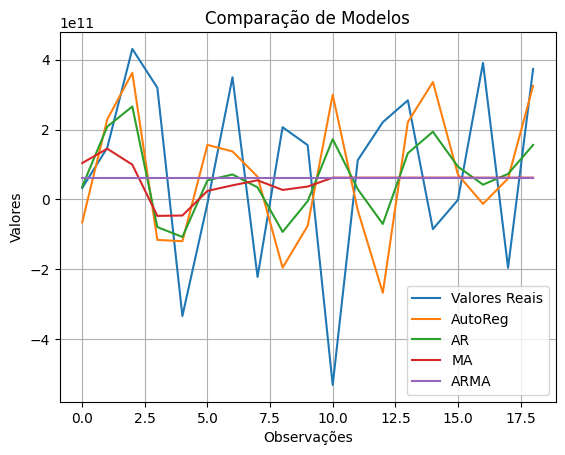

In [ ]:

#dicionário contendo as métricas de erro (como MSE, RMSE, MAE, etc.)
print(f"Autoreg: {get_metrics(X_test.values.squeeze(), autoreg_preds.values)} \n" + \
      f"AR: {get_metrics(X_test.values.squeeze(), ar_preds.values)} \n" + \
      f"MA: {get_metrics(X_test.values.squeeze(), ma_preds.values)} \n" + \
      f"ARMA: {get_metrics(X_test.values.squeeze(), arma_preds.values)} \n")

results = {
    "Valores Reais": X_test.values.squeeze(),
    "AutoReg": autoreg_preds.values.squeeze(),
    "AR": ar_preds.values.squeeze(),
    "MA": ma_preds.values.squeeze(),
    "ARMA": arma_preds.values.squeeze(),
}

# Visualizações do dataframe
df_results = pd.DataFrame(results)
df_results.plot()
plt.title("Comparação de Modelos")
plt.xlabel("Observações")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

Com base nessas métricas, o MA aparenta ser o melhor dos modelos, pois apresenta os menores valores para MSE, RMSE, MAE e AVR. O ARMA, por sua vez, tem o menor MAPE. Entretanto,  esses resultados não são ideais, especialmente em problemas de previsão onde um erro muito grande é problemático.

Para buscar um modelo mais robusto seria importante revisar a qualidade dos dados de entrada, ajustar novamente os parâmetros do modelo ou até mesmo experimentar outras abordagens, como modelos mais complexos ou transformações nos dados para melhorar a precisão.

**7.1 Modelo Arima e avaliações**

In [ ]:
def arima_fit_predict(tsd, test_size, horizon):


   # Separação do conjunto de treino e teste
    ts_train = tsd[:len(tsd) - test_size]  # Conjunto de treinamento
    ts_test = tsd[len(tsd) - test_size:]   # Conjunto de teste (últimos dados)

    # Ajuste do modelo ARIMA usando auto_arima
    arima_run = auto_arima(ts_train,
                           start_p=1, max_p=15,  # Explorar até 15 lags para p
                           start_q=1, max_q=15,  # Explorar até 15 lags para q
                           d=None,  # O modelo escolhe o grau de diferenciação automaticamente
                           seasonal=False,  # Desabilita sazonalidade
                           stepwise=True,  # Busca passo a passo para os melhores parâmetros
                           trace=True,  # Exibe o progresso do ajuste
                           max_order=25,  # Limite para p + q
                           max_iter=50)  # Número máximo de iterações

    # Gerando previsões para o horizonte especificado
    arima_preds = arima_run.predict(len(ts_test))

    return arima_preds

def get_metrics(y_true, y_pred):

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    return {'RMSE': rmse, 'MAE': mae}



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2780.679, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2783.074, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2782.514, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2779.533, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2789.979, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2780.354, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2782.351, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2782.272, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.400 seconds
ARIMA H2 M3: {'RMSE': 410344217841.02563, 'MAE': 359178532924.0132} 



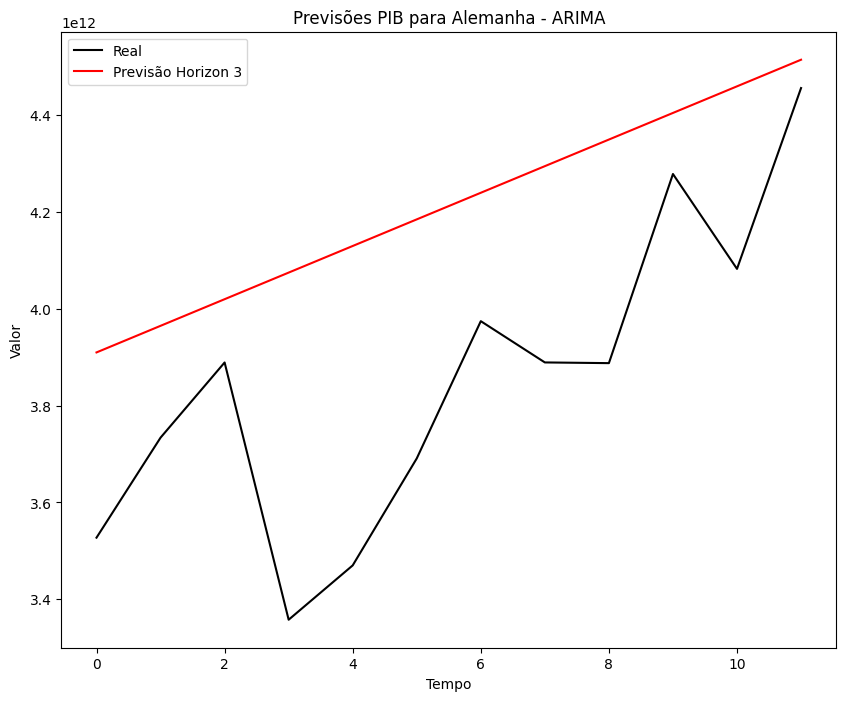

In [ ]:
test_percent = 0.2  # 20% para o conjunto de teste
test_size = int(len(df) * test_percent)

# Previsões para diferentes horizontes (2 e 3 períodos à frente)
results_arima_h2 = {}
results_arima_h2["ground_truth"] = df["Germany"].values[-test_size:]
results_arima_h2["out_h2_m3"] = arima_fit_predict(df["Germany"].values, test_size, 3)

# Avaliar as previsões utilizando as métricas
metrics_h2_m3 = get_metrics(results_arima_h2['ground_truth'], results_arima_h2['out_h2_m3'])

print(f"ARIMA H2 M3: {metrics_h2_m3} \n")

# Organizando resultados para visualização
results_arima_h2_df = pd.DataFrame(results_arima_h2)

# Plotando os resultados
plt.figure(figsize=(10, 8))
plt.plot(results_arima_h2_df["ground_truth"], label="Real", color='black')
plt.plot(results_arima_h2_df["out_h2_m3"], label="Previsão Horizon 3", linestyle='-', color='red')
plt.title("Previsões PIB para Alemanha - ARIMA")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.show()



# **8. Teste Split dos Dados (Extra)**

In [ ]:
germany_data = df['Germany'].values  # Extrair os valores da coluna 'Germany'

# Definindo o número de divisões (n_splits) para a série temporal
ts_split = TimeSeriesSplit(n_splits=3)  # 3 divisões

# Realizando a divisão de treino e teste
for train_idx, test_idx in ts_split.split(germany_data):
    # Selecionando os dados de treino e teste com base nos índices
    train_data = germany_data[train_idx]
    test_data = germany_data[test_idx]

    print(f"Train indices: {train_idx} - Train data: {train_data}")
    print(f"Test indices: {test_idx} - Test data: {test_data}")
    print("-" * 50)


Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] - Train data: [8.43109502e+10 9.62057287e+10 1.05509000e+11 1.11823000e+11
 1.22880000e+11 1.34283000e+11 1.42781000e+11 1.44571000e+11
 1.55956000e+11 1.77085000e+11 2.15838000e+11 2.49985000e+11
 2.99802000e+11 3.98374000e+11 4.45303000e+11 4.90637000e+11]
Test indices: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] - Test data: [5.19754e+11 6.00498e+11 7.40470e+11 8.81345e+11 9.50291e+11 8.00472e+11
 7.76576e+11 7.70684e+11 7.25111e+11 7.32535e+11 1.04626e+12 1.29818e+12
 1.40123e+12 1.39897e+12 1.77167e+12 1.86895e+12]
--------------------------------------------------
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] - Train data: [8.43109502e+10 9.62057287e+10 1.05509000e+11 1.11823000e+11
 1.22880000e+11 1.34283000e+11 1.42781000e+11 1.44571000e+11
 1.55956000e+11 1.77085000e+11 2.15838000e+11 2.49985000e+11
 2.99802000e+11 3.98374000e+11 4.45303000

In [ ]:
# interpolação Linear e Spline

n_psg = df["Italy"]

# Interpolação Linear
n_psg_linear = n_psg.interpolate(method='linear')

# Interpolação Spline (com ordem 3, que é cúbica)
n_psg_spline = n_psg.interpolate(method='spline', order=3)

# Exibir resultados
print("Interpolação Linear:")
print(n_psg_linear.head(10))  # Exibe os primeiros valores da interpolação linear

print("\nInterpolação Spline:")
print(n_psg_spline.head(10))  # Exibe os primeiros valores da interpolação splin

Interpolação Linear:
0    4.191581e+10
1    4.654222e+10
2    5.229335e+10
3    5.989787e+10
4    6.556965e+10
5    7.055440e+10
6    7.644625e+10
7    8.420791e+10
8    9.127508e+10
9    1.007640e+11
Name: Italy, dtype: float64

Interpolação Spline:
0    4.191581e+10
1    4.654222e+10
2    5.229335e+10
3    5.989787e+10
4    6.556965e+10
5    7.055440e+10
6    7.644625e+10
7    8.420791e+10
8    9.127508e+10
9    1.007640e+11
Name: Italy, dtype: float64


A interpolação linear é o método mais simples de interpolação. Conecta pontos consecutivos com uma linha reta. É bastante simples, mas pode não ser ideal para dados que variam de forma mais complexa ou que possuem comportamentos não-lineares.

A interpolação spline é um método mais avançado e flexível. Ela usa funções polinomiais (geralmente de grau superior) para conectar os pontos de dados, o que permite uma suavização dos dados.

**CONCLUSÃO**

O presente trabalho foi elaborado a partir do conjunto de dados chamado "GDP Growth of European Countries". Ele contém informações sobre o crescimento do GDP ("PIB") de mais de 15 países europeus, abrangendo o período de 1960 a 2023.

Várias análises e conclusões foram explicitadas ao longo de todo o trabalho, após aplicações de testes, modelos, avaliações dos modelos e comparações entre os modelos. Também foram plotados diversos gráficos para demonstrar as análises.